# ES 335 Assignment 3, Question 2

## Problem Statement

Learn the following models on XOR dataset (refer to Tensorflow Playground and generate the dataset on your own containing 200 training instances and 200 test instances) such that all these models achieve similar results (good). The definition of good is left subjective – but you would expect the classifier to capture the shape of the XOR function. 
- a MLP
- MLP w/ L1 regularization (you may vary the penalty coefficient by choose the best one using a validation dataset)
- MLP w/ L2 regularization (you may vary the penalty coefficient by choose the best one using a validation dataset)
- learn logistic regression models on the same data with additional features (such as x1*x2, x1^2, etc.)

Show the decision surface and comment on the plots obtained for different models. [2 marks]


## Imports

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import KFold

np.random.seed(0)
torch.manual_seed(0)

## Making and visualizing the dataset

To make the xor dataset, we first randomly generate the points in a cartesian plane. Then we assign the labels to the points based on the XOR function (basically if the product of the x and y coordinates is positive, we assign the label 1, else we assign the label 0). After that we add some noise to the coordinates to make the dataset more realistic.

In [3]:
N = 200

X = torch.rand(2 * N, 2) * 10 - 5
X_train = X[:N]
X_test = X[N:]
y_train = ((X_train[:, 0] * X_train[:, 1]) > 0).to(torch.float32).view(-1, 1)
y_test = ((X_test[:, 0] * X_test[:, 1]) > 0).to(torch.float32).view(-1, 1)

# Add some noise
X_train += torch.randn_like(X_train) * 0.1
X_test += torch.randn_like(X_test) * 0.1

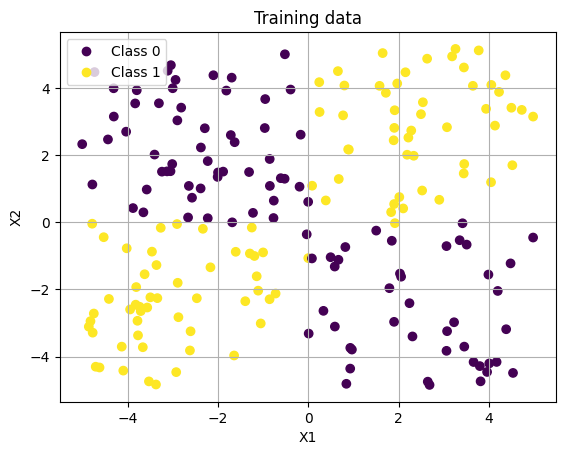

In [4]:
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])
plt.title("Training data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.show()

## Utility Functions

In [5]:
def train(model, epochs, lr, l1_reg, l2_reg, X, y, **kwargs):
	optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=l2_reg)
	loss_fn = torch.nn.BCELoss()

	for epoch in range(epochs):
		optimizer.zero_grad()
		y_pred = model(X, **kwargs)
		loss = loss_fn(y_pred, y)

		if l1_reg > 0:
			loss += l1_reg * sum(p.abs().sum() for p in model.parameters())

		loss.backward()
		optimizer.step()
		if epoch % (epochs // 10) == 0:
			print(f"Epoch {epoch}: loss = {loss.item()}")
   
def accuracy(model, X, y, **kwargs):
	with torch.no_grad():
		y_pred = model(X, **kwargs)
		accuracy = ((y_pred > 0.5) == y).to(torch.float32).mean().item()
	return accuracy

def plot_decision_boundary(model, X, y, res=100, **kwargs):
    x_min, x_max = -6, 6
    y_min, y_max = -6, 6
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, res), np.linspace(y_min, y_max, res))
    points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

    with torch.no_grad():
        Z = model(points, **kwargs).reshape(xx.shape).numpy()

    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=["blue", "red"])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Decision Boundary")
    plt.show()
    
    print("Accuracy:", accuracy(model, X, y, **kwargs))

## Comparing the performance of the models

### Simple MLP

In [7]:
class MLP(nn.Module):
	def __init__(self):
		super(MLP, self).__init__()
		self.fc1 = nn.Linear(2, 10)
		self.fc2 = nn.Linear(10, 1)
		self.act1 = nn.ReLU()
		self.act2 = nn.Sigmoid()

	def forward(self, x):
		x = self.act1(self.fc1(x))
		x = self.act2(self.fc2(x))
		return x

Epoch 0: loss = 0.7347175478935242
Epoch 500: loss = 0.03218695521354675
Epoch 1000: loss = 0.015638161450624466
Epoch 1500: loss = 0.008404872380197048
Epoch 2000: loss = 0.004628452472388744
Epoch 2500: loss = 0.002630804665386677
Epoch 3000: loss = 0.001570007298141718
Epoch 3500: loss = 0.000981367425993085
Epoch 4000: loss = 0.0006370277842506766
Epoch 4500: loss = 0.0004258507105987519


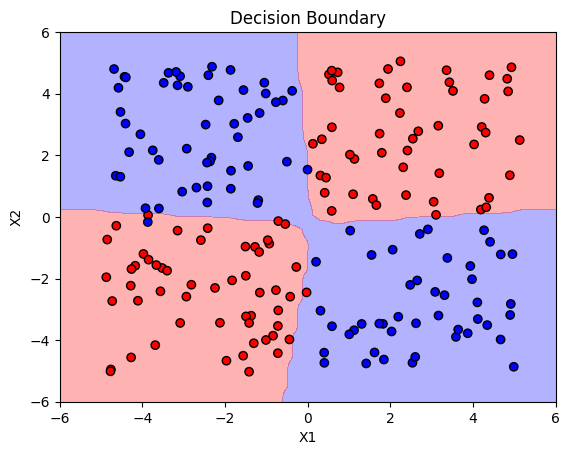

Accuracy: 0.9800000190734863


In [6]:
model = MLP()
train(model, epochs=5000, lr=0.01, l1_reg=0, l2_reg=0)
plot_decision_boundary(model, X_test, y_test)

### MLP + L1 Regularization

Epoch 0: loss = 0.7621252536773682
Epoch 20: loss = 0.5216569900512695
Epoch 40: loss = 0.3788248598575592
Epoch 60: loss = 0.30009427666664124
Epoch 80: loss = 0.25513574481010437
Epoch 100: loss = 0.22744785249233246
Epoch 120: loss = 0.20739798247814178
Epoch 140: loss = 0.19180400669574738
Epoch 160: loss = 0.17925962805747986
Epoch 180: loss = 0.1692451387643814
Epoch 0: loss = 0.9478216767311096
Epoch 20: loss = 0.5200605392456055
Epoch 40: loss = 0.30381280183792114
Epoch 60: loss = 0.20711836218833923
Epoch 80: loss = 0.1642443984746933
Epoch 100: loss = 0.14175505936145782
Epoch 120: loss = 0.12762346863746643
Epoch 140: loss = 0.11766355484724045
Epoch 160: loss = 0.1102493554353714
Epoch 180: loss = 0.10449735820293427
Epoch 0: loss = 0.7695752382278442
Epoch 20: loss = 0.4321405589580536
Epoch 40: loss = 0.2765006124973297
Epoch 60: loss = 0.20137113332748413
Epoch 80: loss = 0.16250954568386078
Epoch 100: loss = 0.13971853256225586
Epoch 120: loss = 0.1250995397567749
Epoc

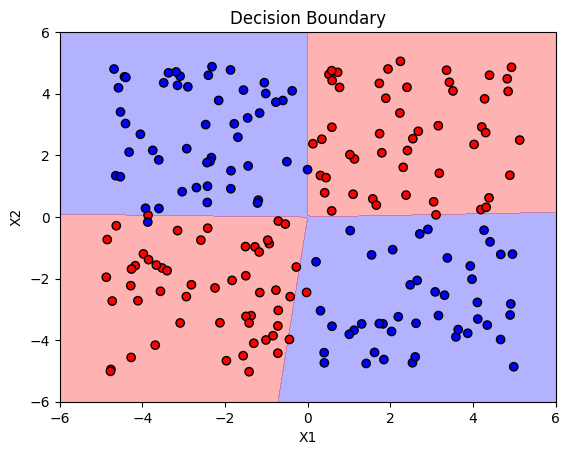

Accuracy: 0.9750000238418579
best l1 parameter 0.01


In [32]:
def cross_validate_l1(model_class, X, y, l1_values, epochs=5000, lr=0.01, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = {}

    for l1 in l1_values:
        fold_errors = []

        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            model = MLP()
            train(model, epochs=epochs, lr=lr, l1_reg=l1, l2_reg=0, X=X_train, y=y_train)
            fold_errors.append(accuracy(model, X_val, y_val))

        results[l1] = np.mean(fold_errors)
    
    return results

l1_vals = [1e-3, 0.01, 0.1, 1, 10]
results = cross_validate_l1(MLP, X_train, y_train, l1_vals, epochs=200, lr=0.01, n_splits=5)

best_l1 = max(results, key=results.get)
model = MLP()
train(model, epochs=5000, lr=0.01, l1_reg=best_l1, l2_reg=0, X=X_train, y=y_train)
plot_decision_boundary(model, X_test, y_test)
print("best l1 parameter", best_l1)


### MLP + L2 Regularization

Epoch 0: loss = 0.7668294310569763
Epoch 20: loss = 0.45594221353530884
Epoch 40: loss = 0.2601372301578522
Epoch 60: loss = 0.167168989777565
Epoch 80: loss = 0.12736473977565765
Epoch 100: loss = 0.10635410249233246
Epoch 120: loss = 0.09323383867740631
Epoch 140: loss = 0.08409305661916733
Epoch 160: loss = 0.07726127654314041
Epoch 180: loss = 0.07189807295799255
Epoch 0: loss = 0.8752832412719727
Epoch 20: loss = 0.5640109777450562
Epoch 40: loss = 0.3829178512096405
Epoch 60: loss = 0.24717538058757782
Epoch 80: loss = 0.18128417432308197
Epoch 100: loss = 0.1469384729862213
Epoch 120: loss = 0.12521550059318542
Epoch 140: loss = 0.10978169739246368
Epoch 160: loss = 0.09788354486227036
Epoch 180: loss = 0.08861289918422699
Epoch 0: loss = 0.7874554395675659
Epoch 20: loss = 0.5224423408508301
Epoch 40: loss = 0.3756510317325592
Epoch 60: loss = 0.28586986660957336
Epoch 80: loss = 0.23268349468708038
Epoch 100: loss = 0.19721107184886932
Epoch 120: loss = 0.17126280069351196
Epo

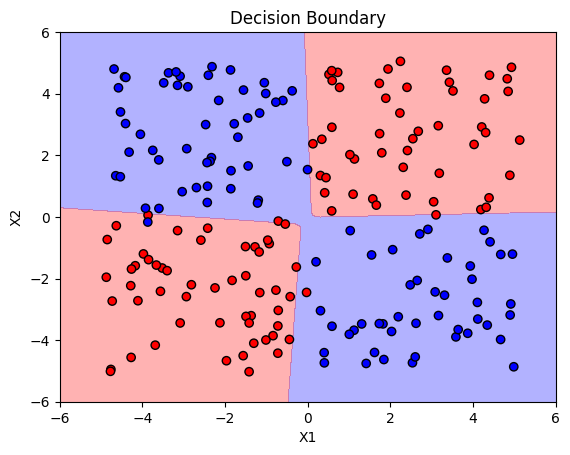

Accuracy: 0.9800000190734863
Best l2 parameter 0.01


In [31]:
# model = MLP()
# train(model, epochs=5000, lr=0.01, l1_reg=0, l2_reg=0.01)
# plot_decision_boundary(model, X_test, y_test)

def cross_validate_l2(model_class, X, y, l2_values, epochs=5000, lr=0.01, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = {}

    for l2 in l2_values:
        fold_errors = []

        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            model = MLP()
            train(model, epochs=epochs, lr=lr, l1_reg=0, l2_reg=l2, X=X_train, y=y_train)
            fold_errors.append(accuracy(model, X_val, y_val))

        results[l2] = np.mean(fold_errors)
    
    return results

l2_vals = [1e-3, 0.01, 0.1, 1, 10]
results = cross_validate_l2(MLP, X_train, y_train, l2_vals, epochs=200, lr=0.01, n_splits=5)

best_l2 = max(results, key=results.get)
model = MLP()
train(model, epochs=5000, lr=0.01, l1_reg=0, l2_reg=best_l2, X=X_train, y=y_train)
plot_decision_boundary(model, X_test, y_test)
print("Best l2 parameter", best_l2)

### Logistic Regression with different features

#### Logistic Regression with features X1, X2 only

In [9]:
class LogisticRegression(nn.Module):
	def __init__(self, features):
		super().__init__()
		self.fc = nn.Linear(features, 1)
		self.act = nn.Sigmoid()

	def forward(self, x, selected_features=[0, 1]):
		X = torch.cat([x, x ** 2, (x[:, 0] * x[:, 1]).view(-1, 1)], dim=1)[:, selected_features]
		return self.act(self.fc(X))

Epoch 0: loss = 0.7152947187423706
Epoch 100: loss = 0.6966071128845215
Epoch 200: loss = 0.6931764483451843
Epoch 300: loss = 0.6929323673248291
Epoch 400: loss = 0.6929261684417725
Epoch 500: loss = 0.6929261684417725
Epoch 600: loss = 0.6929261088371277
Epoch 700: loss = 0.6929261684417725
Epoch 800: loss = 0.6929261684417725
Epoch 900: loss = 0.6929261684417725


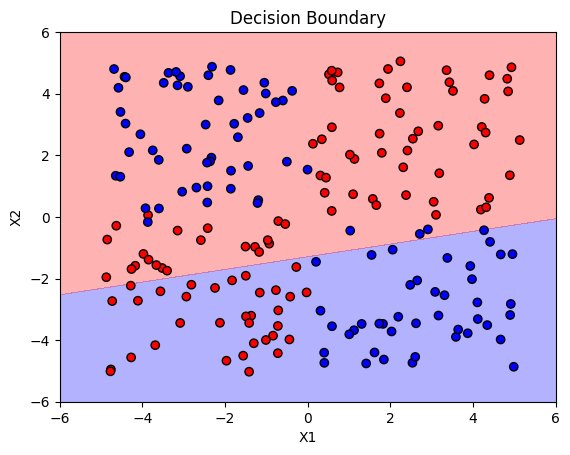

Accuracy: 0.5649999976158142


In [10]:
model = LogisticRegression(2)
train(model, epochs=1000, lr=0.001, l1_reg=0, l2_reg=0)
plot_decision_boundary(model, X_test, y_test)

#### Logistic Regression with features X1^2, X2^2

Epoch 0: loss = 10.117301940917969
Epoch 1000: loss = 0.10161882638931274
Epoch 2000: loss = 0.07498549669981003
Epoch 3000: loss = 0.06135448068380356
Epoch 4000: loss = 0.05230683460831642
Epoch 5000: loss = 0.04565917328000069
Epoch 6000: loss = 0.0405544713139534
Epoch 7000: loss = 0.03656698390841484
Epoch 8000: loss = 0.03344307467341423
Epoch 9000: loss = 0.0310037974268198


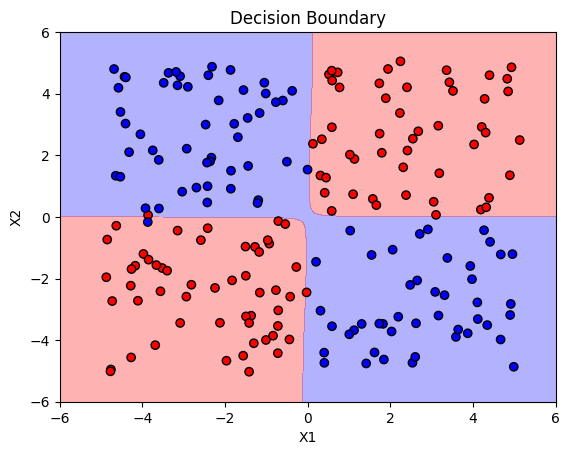

Accuracy: 0.9850000143051147


In [11]:
model = LogisticRegression(2)
train(model, epochs=10000, lr=0.01, l1_reg=0, l2_reg=0, selected_features=[3, 4])
plot_decision_boundary(model, X_test, y_test, selected_features=[3, 4])

#### Logistic Regression with X1 * X2 as a feature

Epoch 0: loss = 5.983279228210449
Epoch 1000: loss = 0.12746202945709229
Epoch 2000: loss = 0.09340027719736099
Epoch 3000: loss = 0.07629101723432541
Epoch 4000: loss = 0.06501242518424988
Epoch 5000: loss = 0.056693825870752335
Epoch 6000: loss = 0.05021243914961815
Epoch 7000: loss = 0.04500862956047058
Epoch 8000: loss = 0.04075261950492859
Epoch 9000: loss = 0.03723403811454773


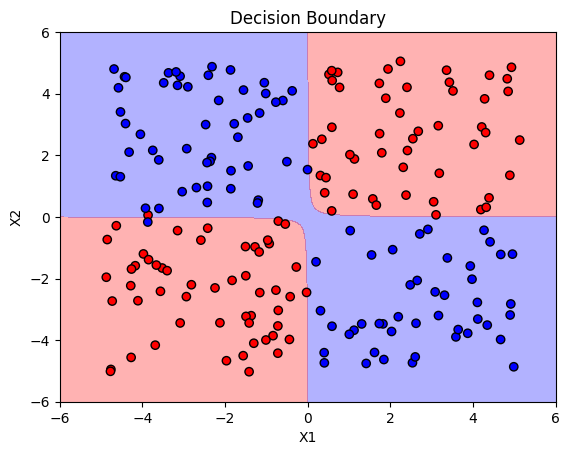

Accuracy: 0.9900000095367432


In [12]:
model = LogisticRegression(1)
train(model, epochs=10000, lr=0.01, l1_reg=0, l2_reg=0, selected_features=[4])
plot_decision_boundary(model, X_test, y_test, selected_features=[4])

#### Logistic Regression with X1, X2, X1^2, X2^2, X1 * X2 as features

Epoch 0: loss = 2.634404182434082
Epoch 1000: loss = 0.08507555723190308
Epoch 2000: loss = 0.06222391128540039
Epoch 3000: loss = 0.051569223403930664
Epoch 4000: loss = 0.04492141306400299
Epoch 5000: loss = 0.0401337705552578
Epoch 6000: loss = 0.036410413682460785
Epoch 7000: loss = 0.03338928148150444
Epoch 8000: loss = 0.030869154259562492
Epoch 9000: loss = 0.02871205098927021


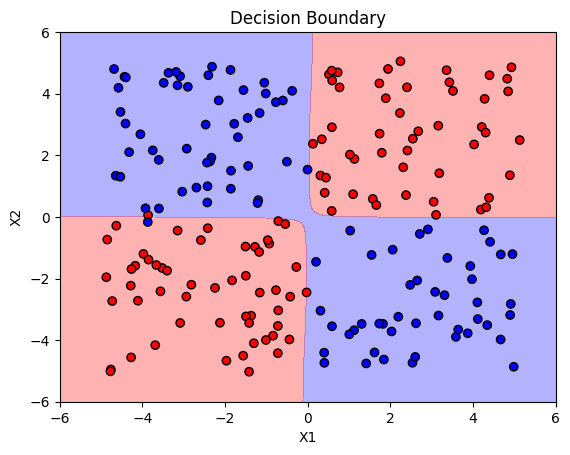

Accuracy: 0.9850000143051147


In [13]:
model = LogisticRegression(5)
train(model, epochs=10000, lr=0.01, l1_reg=0, l2_reg=0, selected_features=[0, 1, 2, 3, 4])
plot_decision_boundary(model, X_test, y_test, selected_features=[0, 1, 2, 3, 4])